# Random Forest training

### First fit of the model

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [2]:
df_train = pd.read_csv("data/data_train.csv")
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,10,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,9,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


In [3]:
X_train = df_train.drop("income", axis=1)
y_train = df_train["income"]

In [4]:
df_test = pd.read_csv("data/data_test.csv")
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,2,215419,0,13,2,3,0,0,1,0,0,36,0,0
16277,64,5,321403,1,9,6,11,5,1,0,0,0,40,0,0
16278,38,2,374983,0,13,1,3,1,0,0,0,0,50,0,0
16279,44,2,83891,0,13,2,0,3,2,0,5455,0,40,0,0


In [5]:
X_test = df_test.drop("income", axis=1)
y_test = df_test["income"]

In [6]:
model = RandomForestClassifier()

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
pred = model.predict(X_test)

In [9]:
model.score(X_train, y_train)

0.9999385768250361

In [10]:
model.score(X_test, y_test)

0.8544929672624532

In [11]:
f1_score(y_test, pred)

0.6645901175138044

### Hyper parameter tuning

In [118]:
param_rf = {
    "n_estimators" : [200, 400, 800],
    "max_depth": [8, 12, 16, None],
    "max_features" : ["log2", "sqrt", "auto", None],
    "oob_score" : [True, False]
}

In [119]:
grid = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid= param_rf,
                        cv= 3,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= 10)
result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [120]:
print(result.best_params_, result.best_score_)

{'max_depth': 12, 'max_features': None, 'n_estimators': 200, 'oob_score': True} 0.8641013524721005


In [121]:
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print("The mean generalization accuracy of the model is {:.2f}% (+/- {:.2f}%)".format(np.mean(all_accuracies) * 100, np.std(all_accuracies) * 100))

The mean generalization accuracy of the model is 85.80% (+/- 0.33%)


#### Validation Curve

In [122]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [100, 200], cv = 3)

In [123]:
test_scoreNum

array([[0.85166759, 0.85995946, 0.85939372],
       [0.8528653 , 0.86023586, 0.859578  ]])

### ROC curve

In [124]:
model_tuned = RandomForestClassifier(max_depth=12,
                               max_features=None,
                               n_estimators=200,
                               oob_score=True
                              )

In [125]:
model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=None, n_estimators=200,
                       oob_score=True)

In [126]:
probs = model_tuned.predict_proba(X_test)

probs = probs[:, 1]

Text(0.5, 1.0, 'ROC curve')

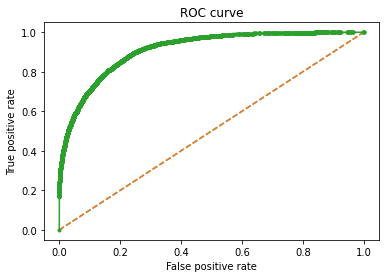

In [127]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs, drop_intermediate = True)

plt.plot([(0,0), (1,1)], linestyle="--")
plt.plot(false_positive_rate, true_positive_rate, marker=".")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

#### Moving threshold based on ROC curve

In [128]:
gmeans = np.sqrt(true_positive_rate * (1 - false_positive_rate))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.270267, G-Mean=0.825


Text(0.5, 1.0, 'ROC curve')

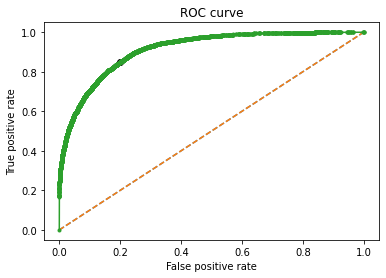

In [129]:
plt.plot([(0,0), (1,1)], linestyle="--", label="No skill")
plt.plot(false_positive_rate, true_positive_rate, marker=".", label="Random Forest")
plt.scatter(false_positive_rate[ix], true_positive_rate[ix], marker='o', color='black', label='Best')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

In [130]:
predicted_proba = model_tuned.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= thresholds[ix]).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.8126650697131625


In [131]:
f1_score(y_test, predicted)

0.6815619127166422

In [140]:
predicted = (predicted_proba [:,1] >= 0.4).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)
print(f1_score(y_test, predicted))

0.8571340826730545
0.6953902566788895


### Resample

In [136]:
majority_len = df_train[df_train.income == 0].shape[0]
minority_len = df_train[df_train.income == 1].shape[0]

In [137]:
df_majority = df_train[df_train.income == 0]
df_minority = df_train[df_train.income == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=majority_len,    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X_train_up = df_train.drop("income", axis=1)
y_train_up = df_train["income"]

grid_up = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid= param_rf,
                        cv= 3,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= 10)
result_up = grid_up.fit(X_train_up, y_train_up)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [139]:
print(result_up.best_params_, result_up.best_score_)

{'max_depth': 12, 'max_features': None, 'n_estimators': 800, 'oob_score': False} 0.8641935013831787


Text(0.5, 1.0, 'ROC curve')

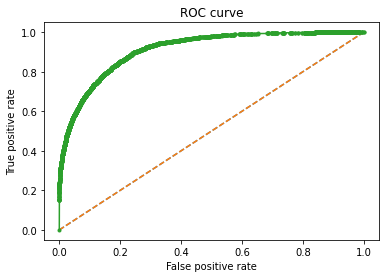

In [141]:
model_up = RandomForestClassifier(max_depth=12,
                               max_features=None,
                               n_estimators=800,
                               oob_score=False
                              )

model_up.fit(X_train_up, y_train_up)

probs_up = model_up.predict_proba(X_test)

probs_up = probs_up[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs_up, drop_intermediate = True)

plt.plot([(0,0), (1,1)], linestyle="--")
plt.plot(false_positive_rate, true_positive_rate, marker=".")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

Best Threshold=0.266876, G-Mean=0.826


Text(0.5, 1.0, 'ROC curve')

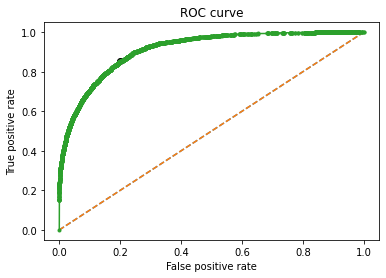

In [142]:
gmeans = np.sqrt(true_positive_rate * (1 - false_positive_rate))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.plot([(0,0), (1,1)], linestyle="--", label="No skill")
plt.plot(false_positive_rate, true_positive_rate, marker=".", label="Random Forest")
plt.scatter(false_positive_rate[ix], true_positive_rate[ix], marker='o', color='black', label='Best')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

In [143]:
predicted_proba = model_up.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= thresholds[ix]).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)
print(f1_score(y_test, predicted))

0.811743750383883
0.6816245974862366


In [160]:
predicted_proba = model_up.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= 0.345).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)
print(f1_score(y_test, predicted))

0.8460782507217002
0.6974891356832448


In [161]:
df_majority_upsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=minority_len,    # to match majority class
                                 random_state=123) # reproducible results

df_downsampled = pd.concat([df_majority_upsampled, df_majority])

X_train_down = df_train.drop("income", axis=1)
y_train_down = df_train["income"]

grid_down = GridSearchCV(estimator= RandomForestClassifier(),
                        param_grid= param_rf,
                        cv= 3,
                        scoring= 'accuracy',
                        n_jobs= -1,
                        verbose= 10)
result_down = grid_down.fit(X_train_down, y_train_down)
print(result_down.best_params_, result_down.best_score_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
{'max_depth': 12, 'max_features': None, 'n_estimators': 200, 'oob_score': False} 0.8638249679920835


Text(0.5, 1.0, 'ROC curve')

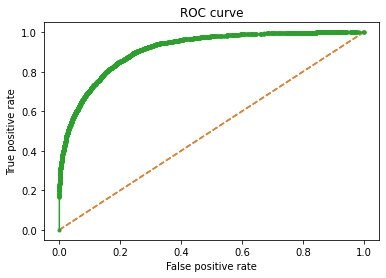

In [162]:
model_down = RandomForestClassifier(max_depth=12,
                               max_features=None,
                               n_estimators=200,
                               oob_score=False
                              )

model_down.fit(X_train_down, y_train_down)

probs_down = model_down.predict_proba(X_test)

probs_down = probs_down[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs_down, drop_intermediate = True)

plt.plot([(0,0), (1,1)], linestyle="--")
plt.plot(false_positive_rate, true_positive_rate, marker=".")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

Best Threshold=0.276080, G-Mean=0.826


Text(0.5, 1.0, 'ROC curve')

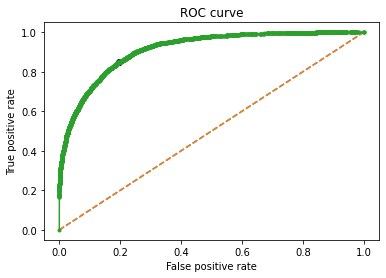

In [163]:
gmeans = np.sqrt(true_positive_rate * (1 - false_positive_rate))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.plot([(0,0), (1,1)], linestyle="--", label="No skill")
plt.plot(false_positive_rate, true_positive_rate, marker=".", label="Random Forest")
plt.scatter(false_positive_rate[ix], true_positive_rate[ix], marker='o', color='black', label='Best')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.title("ROC curve")

In [164]:
predicted_proba = model_down.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= thresholds[ix]).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)
print(f1_score(y_test, predicted))

0.8154290277010011
0.684514435695538


In [182]:
predicted_proba = model_down.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= 0.363).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)
print(f1_score(y_test, predicted))

0.850991953811191
0.6984087518647439
